In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft

In [2]:
FIL_FOLDER = "20200820_Filter_Test/"

In [3]:
params, data = sio.read_dat(FIL_FOLDER + "PLLBode_optimal_BW_CF_AMP.dat")#
data = data.iloc[::-1]
cent_freq = data["Center Frequency (Hz)"].values
amp = data["Amplitude (m)"].values
lorentzian = sft.fit_lorentzian(x=cent_freq, y=amp)

FWHM = 2243.28724627949


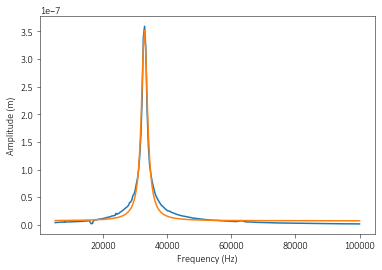

In [4]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(cent_freq, amp)
ax.plot(cent_freq, lorentzian.best_fit)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude (m)")
print(f"FWHM = {lorentzian.params['fwhm'].value}")

In [5]:
lorentzian

## Optimizing for CF = 32.9k vs CF = 45k 

In [7]:
%matplotlib widget

norm = 3.81785e-07
norm_x = 1e3

params, data = sio.read_dat(FIL_FOLDER + "PLLBode_optimal_BW_CF_AMP.dat")#
data = data.iloc[::-1]
cent_freq = data["Center Frequency (Hz)"].values
amp = data["Amplitude (m)"].values
lorentzian = sft.fit_lorentzian(x=cent_freq, y=amp)

fig, ax = plt.subplots()
ax.plot(cent_freq/norm_x, amp/norm, label="Narrow bandpass")
ax.set_xlabel("Frequency (kHz)")
ax.set_ylabel("Amplitude (m)")

params, data = sio.read_dat(FIL_FOLDER + "PLLBode_optimal_A-Probe.dat")#
data = data.iloc[::-1]
cent_freq = data["Center Frequency (Hz)"].values
amp = data["Amplitude (m)"].values
lorentzian = sft.fit_lorentzian(x=cent_freq, y=amp)

ax.plot(cent_freq/norm_x, amp/norm, label="Broad bandpass")
ax.set_xlabel("Frequency (kHz)")
ax.set_ylabel("Transmission (%)")

ax.axvline(45000/norm_x, ls="--", color="C3", label=r"A-probe $\omega_R \approx 45$ kHz")
ax.axvline(32900/norm_x, ls="--", color="C2", label=r"Diamond tip $\omega_R \approx 32.9$ kHz")

ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …